In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import datasets

In [2]:
data = datasets.load_boston()
print(dir(data))

['DESCR', 'data', 'feature_names', 'filename', 'target']


In [3]:
print(data.data.shape)

(506, 13)


In [48]:
data.data.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

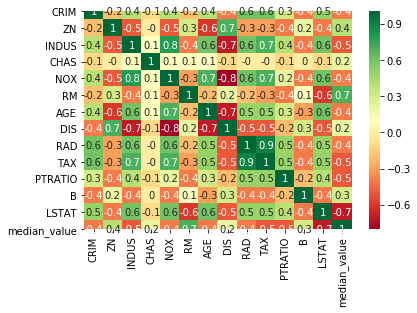

In [5]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['median_value'] = data.target
sns.heatmap(boston.corr().round(1), cmap='RdYlGn', annot=True)

In [6]:
#Regressors 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

### Linear Regression

In [7]:
#X,y
X_LR = data.data
y_LR = data.target

In [8]:
#Train_Test Split
X_LR_train,X_LR_test,y_LR_train,y_LR_test = train_test_split(X_LR,y_LR,test_size=0.3,random_state=42)

In [9]:
#Initiate
reg = LinearRegression()

In [10]:
#Fit
reg.fit(X_LR_train,y_LR_train)
#Predict 
y_LR_pred = reg.predict(X_LR_test)

In [11]:
print(pd.DataFrame({'Actual': y_LR_test, 'Predicted': y_LR_pred}))

     Actual  Predicted
0      23.6  28.648960
1      32.4  36.495014
2      13.6  15.411193
3      22.8  25.403213
4      16.1  18.855280
..      ...        ...
147    17.1  17.403672
148    14.5  13.385941
149    50.0  39.983425
150    14.3  16.682863
151    12.6  18.285618

[152 rows x 2 columns]


In [12]:
from sklearn.metrics import mean_squared_error

print("R^2: {}".format(reg.score(X_LR_test, y_LR_test)))
rmse = np.sqrt(mean_squared_error(y_LR_test,y_LR_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.711226005748496
Root Mean Squared Error: 4.638689926172797


In [13]:
from sklearn import metrics
# Regression metrics
explained_variance=metrics.explained_variance_score(y_LR_test, y_LR_pred) # The best possible score is 1.0, lower values are worse.
mean_absolute_error=metrics.mean_absolute_error(y_LR_test, y_LR_pred) #a risk metric corresponding to the expected 
# value of the absolute error loss
mse=metrics.mean_squared_error(y_LR_test, y_LR_pred) # a risk metric corresponding to the expected 
#value of the squared (quadratic) error or loss
median_absolute_error=metrics.median_absolute_error(y_LR_test, y_LR_pred)
r2=metrics.r2_score(y_LR_test, y_LR_pred)

In [14]:
print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.7113
r2:  0.7112
MAE:  3.1627
MSE:  21.5174
RMSE:  4.6387


### Ridge Regression

In [15]:
#X,y
X_RR = data.data
y_RR = data.target

In [16]:
#train_test
X_RR_train, X_RR_test,y_RR_train,y_RR_test = train_test_split(X_RR, y_RR,test_size=0.3, random_state = 42)

In [17]:
#Initiate
ridge =Ridge(normalize=True)
param_grid={'alpha': [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=4)

In [18]:
#fit 
ridge_cv.fit(X_RR_train,y_RR_train)
#predict
y_RR_pred = ridge_cv.predict(X_RR_test)

In [19]:
ridge_cv.score(X_RR_test,y_RR_test)

0.6996938275127313

In [20]:
print(pd.DataFrame({'Actual': y_RR_test, 'Predicted': y_RR_pred}))

     Actual  Predicted
0      23.6  27.970238
1      32.4  35.383077
2      13.6  16.826075
3      22.8  25.145152
4      16.1  18.748605
..      ...        ...
147    17.1  17.602317
148    14.5  14.592344
149    50.0  38.840488
150    14.3  16.777277
151    12.6  18.355738

[152 rows x 2 columns]


In [21]:
#metric
from sklearn import metrics
# Regression metrics
explained_variance=metrics.explained_variance_score(y_RR_test, y_RR_pred) # The best possible score is 1.0, lower values are worse.
mean_absolute_error=metrics.mean_absolute_error(y_RR_test, y_RR_pred) #a risk metric corresponding to the expected 
# value of the absolute error loss
mse=metrics.mean_squared_error(y_RR_test, y_RR_pred) # a risk metric corresponding to the expected 
#value of the squared (quadratic) error or loss
median_absolute_error=metrics.median_absolute_error(y_RR_test, y_RR_pred)
r2=metrics.r2_score(y_RR_test, y_RR_pred)

In [22]:
print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.6997
r2:  0.6997
MAE:  3.1638
MSE:  22.3767
RMSE:  4.7304


### LASSO

In [35]:
#X,y
X_LA = data.data
y_LA = data.target

#train_test
X_LA_train, X_LA_test,y_LA_train,y_LA_test = train_test_split(X_LA, y_LA,test_size=0.3, random_state = 42)

#Initiate
lasso = Lasso()
param_grid={'alpha': [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=4)

#fit 
lasso_cv.fit(X_LA_train,y_LA_train)

#predict
y_LA_pred = lasso_cv.predict(X_LA_test)

In [45]:
print(lasso_cv.best_score_)
print(lasso_cv.best_estimator_.alpha)
print(lasso_cv.best_params_)
print(lasso_cv.best_estimator_)

0.7015959632760466
0.1
{'alpha': 0.1}
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
False


In [37]:
#metric
from sklearn import metrics
# Regression metrics
explained_variance=metrics.explained_variance_score(y_LA_test, y_LA_pred) # The best possible score is 1.0, lower values are worse.
mean_absolute_error=metrics.mean_absolute_error(y_LA_test, y_LA_pred) #a risk metric corresponding to the expected 
# value of the absolute error loss
mse=metrics.mean_squared_error(y_LA_test, y_LA_pred) # a risk metric corresponding to the expected 
#value of the squared (quadratic) error or loss
median_absolute_error=metrics.median_absolute_error(y_LA_test, y_LA_pred)
r2=metrics.r2_score(y_LA_test, y_LA_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.6919
r2:  0.6918
MAE:  3.2674
MSE:  22.9638
RMSE:  4.7921


### Elastic Net

In [26]:
#X,y
X_ER = data.data
y_ER = data.target

#train_test
X_ER_train, X_ER_test,y_ER_train,y_ER_test = train_test_split(X_ER, y_ER,test_size=0.3, random_state = 42)

#Initiate
elastic = ElasticNet()
param_grid={'alpha': [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75]}
elastic_cv = GridSearchCV(elastic, param_grid, cv=4)

#fit 
elastic_cv.fit(X_ER_train,y_ER_train)

#predict
y_ER_pred = elastic_cv.predict(X_ER_test)

In [27]:
print(elastic_cv.best_score_)
print(elastic_cv.best_estimator_.alpha)

0.7026117471583591
0.1


In [28]:
#metric
from sklearn import metrics
# Regression metrics
explained_variance=metrics.explained_variance_score(y_ER_test, y_ER_pred) # The best possible score is 1.0, lower values are worse.
mean_absolute_error=metrics.mean_absolute_error(y_ER_test, y_ER_pred) #a risk metric corresponding to the expected 
# value of the absolute error loss
mse=metrics.mean_squared_error(y_ER_test, y_ER_pred) # a risk metric corresponding to the expected 
#value of the squared (quadratic) error or loss
median_absolute_error=metrics.median_absolute_error(y_ER_test, y_ER_pred)
r2=metrics.r2_score(y_ER_test, y_ER_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.6924
r2:  0.6923
MAE:  3.2952
MSE:  22.9266
RMSE:  4.7882


In [29]:
print(reg.coef_)

[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


In [30]:
print(elastic_cv)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
                                   0.5, 0.55, 0.6, 0.65, 0.7, 0.75]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
